# Cracking Iris

## 1.Import Iris data

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.Visualize Iris Data

In [118]:
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
iris_data = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

In [206]:
features = iris_data.values

In [174]:
feature_names = iris_data.columns.tolist()
feature_names

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [122]:
target = iris['Species'].values

In [123]:
target_names = iris['Species'].drop_duplicates().tolist()

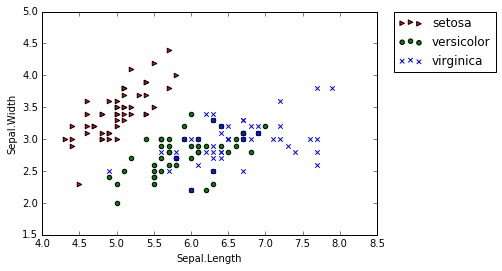

In [132]:
for t in target_names:
   if t == 'setosa':
    c = 'r'
    marker = '>'
    label = 'setosa'
   elif t == 'versicolor':
    c = 'g'
    marker = 'o'
    label = 'versicolor'
   elif t == 'virginica':
    c = 'b'
    marker = 'x'
    label = 'virginica'
   plt.scatter(features[target == t,0],features[target == t,1],marker = marker,c=c,label=label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

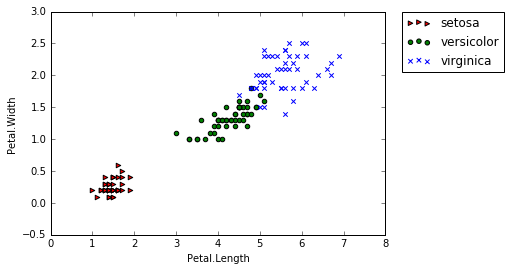

In [133]:
for t in target_names:
   if t == 'setosa':
    c = 'r'
    marker = '>'
    label = 'setosa'
   elif t == 'versicolor':
    c = 'g'
    marker = 'o'
    label = 'versicolor'
   elif t == 'virginica':
    c = 'b'
    marker = 'x'
    label = 'virginica'
   plt.scatter(features[target == t,2],features[target == t,3],marker = marker,c=c,label=label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

## 3. Multinominal Regression Analysis

In [134]:
from sklearn import linear_model

### Split Train and Test data

In [202]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size = 0.2)

### Make Logistic Model

In [143]:
mlr = linear_model.LogisticRegression()

In [203]:
mlr.fit(train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']], train['Species'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict

In [204]:
predict = mlr.predict(test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

### Calculate Accuracy

In [171]:
print("Logistic Regression Test Accuracy: %.2f%%" % (np.sum(predict == test['Species']) * 100.0 / test['Species'].size ))

Logistic Regression Test Accuracy: 96.67%


### Make a Confusion Matrix

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predict, test['Species'], labels=target_names)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [201]:
for i in range(predict.size):
    if predict[i] != test.iloc[i]['Species']:
        print(predict[i], test.iloc[i]['Species'])

('virginica', 'versicolor')


## 4. Decision Tree Analysis

In [207]:
from sklearn import tree

In [208]:
clf = tree.DecisionTreeClassifier()

In [209]:
clf.fit(train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']], train['Species'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [213]:
clt_predict = clf.predict(test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

In [214]:
clt_predict

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa'], dtype=object)

In [215]:
print("Decision Tree Test Accuracy: %.2f%%" % (np.sum(clt_predict == test['Species']) * 100.0 / test['Species'].size ))

Decision Tree Test Accuracy: 96.67%


In [216]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clt_predict, test['Species'], labels=target_names)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [217]:
for i in range(clt_predict.size):
    if clt_predict[i] != test.iloc[i]['Species']:
        print(clt_predict[i], test.iloc[i]['Species'])

('versicolor', 'virginica')


In [219]:
tree.export_graphviz(clf, out_file='tree.dot')    